#### Image Filter
Image Sharping: Laplacian<br>
Edge Detection: Sobel<br>
Image Blurring: Median/Gaussian<br>
Harris Corner Detector<br>
#### Feature Points
SIFT, HoG, Fast<br>
RANSAC<br>

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
# use matplotlib to show cv2_read_img
def show_img(img, winname='figure1', subplot=False):
    #plt.figure()
    if len(img.shape)==3 and img.shape[2] == 3:
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
    else:
        plt.imshow(img, cmap='gray')
    plt.xticks(())
    plt.yticks(())
    plt.title(winname)
    if not subplot:
        plt.show()

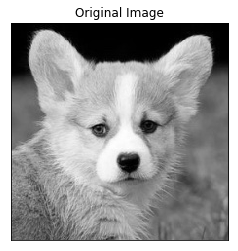

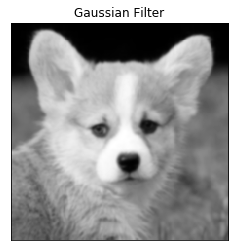

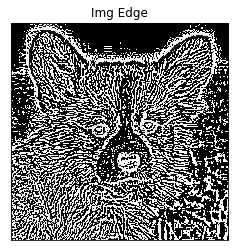

In [56]:
# Image Blurring: Gaussian Filter
img = cv2.imread("./img/dog.jpg", 0)
#img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show_img(img, "Original Image")
img_gauss = cv2.GaussianBlur(img, (7, 7), 1) # kernel_size=7x7, x_std=3
show_img(img_gauss, "Gaussian Filter")
img_edge = img - img_gauss
show_img(img_edge, "Img Edge")

[[0.12895603]
 [0.14251846]
 [0.15133131]
 [0.1543884 ]
 [0.15133131]
 [0.14251846]
 [0.12895603]]


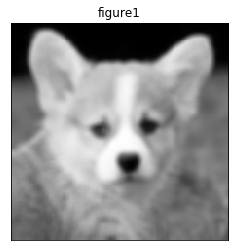

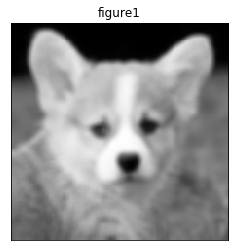

26.15909090909091


In [45]:
# view gaussian kernel
import time

kernel = cv2.getGaussianKernel(7, 5)
print(kernel)
time_g1 = time.time()
img_g1 = cv2.GaussianBlur(img, (7,7), 5)
time_g1 = time.time() - time_g1 

# 分步高斯
time_g2 = time.time()
img_g2 = cv2.sepFilter2D(img, -1, kernel, kernel)
time_g2 = time.time() - time_g2
show_img(img_g1)
show_img(img_g2)
print(time_g1/time_g2)

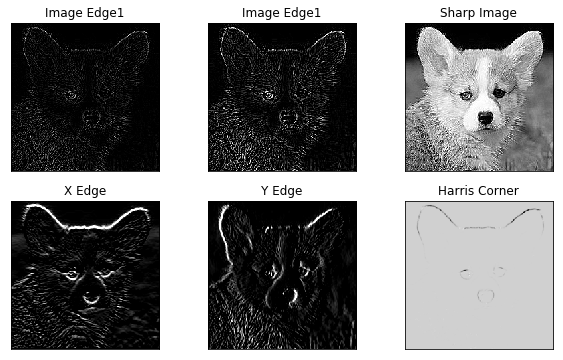

In [60]:
# Image Sharping: Laplacian
# 提取边缘
img = cv2.imread("./img/dog.jpg", 0)
plt.figure(figsize=(10,6))

kernel = np.array([[0, -1, 0],
                   [-1, 4, -1],
                   [0, -1, 0]], dtype=np.float32)
img_lap = cv2.filter2D(img, -1, kernel=kernel) # -1表示输出图像与原图像深度保持一致
plt.subplot(2,3,1)
show_img(img_lap, "Image Edge1", True)

kernel = np.array([[-1, -1, -1],
                   [-1, 8, -1],
                   [-1, -1, -1]], dtype=np.float32)
img_lap = cv2.filter2D(img, -1, kernel=kernel)
plt.subplot(2,3,2)
show_img(img_lap, "Image Edge1", True)

# 图像锐化： origin image + image eage
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]], dtype=np.float32)
img_sharp = cv2.filter2D(img, -1, kernel=kernel)
plt.subplot(2,3,3)
show_img(img_sharp, "Sharp Image", True)

# x轴边缘
kernel = np.array([[-1, -2, -1],
                   [0, 0, 0],
                   [1, 2, 1]], dtype=np.float32)
img_ = cv2.filter2D(img, -1, kernel=kernel) 
plt.subplot(2,3,4)
show_img(img_, "X Edge", True)

# y轴边缘
kernel = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]], dtype=np.float32)
img_ = cv2.filter2D(img, -1, kernel=kernel) 
plt.subplot(2,3,5)
show_img(img_, "Y Edge", True)

# 角点
img_ = cv2.cornerHarris(img, 2, 3, 0.05)
plt.subplot(2,3,6)
show_img(img_, "Harris Corner")
plt.show()

#### Homegraphy(单应性矩阵）
[Reading]https://blog.csdn.net/moonlightpeng/article/details/80426227 <br>
A Homegraphy is a transformation(3x3 matrix) that maps the points in one image to the corresponding  points in the other image <br>
$$ \begin{bmatrix} x_1 \\ y_1 \\ 1 \end{bmatrix} = H \begin{bmatrix} x_2 \\ y_2 \\ 1 \end{bmatrix} = \begin{bmatrix} h_{00} & h_{01} & h_{02} \\ h_{10} & h{11} & h{12} \\ h_{20} & h_{21} &h_{22} \end{bmatrix} \begin{bmatrix} x_2 \\ y_2 \\ 1 \end{bmatrix} $$

In [4]:
# '''
# pts_src and pts_dst are numpy arrays of points
# in source and destination images. We need at least
# 4 corresponding points.
# '''
# h, status = cv2.findHomography(pts_src, pts_dst)
 
# '''
# The calculated homography can be used to warp
# the source image to destination. Size is the
# size (width,height) of im_dst
# '''
 
# im_dst = cv2.warpPerspective(im_src, h, size)

#### Hog(Histogram of Oriented Gradient 梯度直方图）
[Reading]https://www.learnopencv.com/histogram-of-oriented-gradients/ <br>
https://lear.inrialpes.fr/people/triggs/pubs/Dalal-cvpr05.pdf
1. Normalize gamma and color
2. Calculate the Gradient Images
3. Weighted vote into spatial and orientation cells
4. Contrast normalize over overlapping spatial blocks
5. Collect HOG's over detection window


#### SIFIT(Scale-invariant feature transform 尺度不变特征变换)
1. Generate Scale-space: DoG
2. Scale-space Extrema Detection
3. Accurate Ketpoint Localization
4. Eliminating Edge Responses
5. Orientation Assignment
6. Kepoint Descriptor

#### RANSAC（Random Sample Consensus 随机抽样一致)
1. 随机从数据集中随机抽出4个样本数据 (此4个样本之间不能共线)，则这4对点叫做内点（inlier),其它的点叫外点(outlier);
2. 计算出单应性矩阵H，记为模型M；
3. 计算所有outliers与模型M的投影误差，若误差小于阈值，加入内点集 I ；
4. 如果当前内点集 I 元素个数大于最优内点集 I_best , 则更新 I_best = I，同时更新迭代次数k ;
5. 如果迭代次数大于k,则退出 ; 否则迭代次数加1，并重复上述步骤；

